

# 0. Importación de librerias y carga de datos

In [ ]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
np.random.seed(3301)

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para crear el arbol de decisión 
from sklearn.ensemble import RandomForestClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold
#Librerías para la visualización
import matplotlib as mplt
import matplotlib.pyplot as plt
# Libreria para manejar el desbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
# Seaborn
import seaborn as sns 
from sklearn import tree

In [ ]:
df=pd.read_csv('datosPred.csv', sep=',', encoding = 'utf-8')

Primero, llenamos las celdads del df que se encuentren vacias con "Invalid", en pro de evitar eliminar dichas filas, pero evidenciando su invalidez.

In [ ]:
df_duplicado = df
df_duplicado = df_duplicado.fillna("Invalid")
print("Contamos con un total de " + str(df_duplicado.shape[0]) + " registros iniciales. \nAgrupados en un total de " + str(df_duplicado.shape[1]) + " columnas.")

Contamos con un total de 7499 registros iniciales. 
Agrupados en un total de 17 columnas.


In [ ]:
df_duplicado = df_duplicado.drop(["SkinCancer"],axis=1)

In [ ]:
df_duplicado["HeartDisease"] = rf.predict(df_duplicado)

In [ ]:
df_duplicado.to_csv("datosPredicciones.csv")

In [ ]:
df_duplicado.columns


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'Sex_Female',
       'Sex_Male', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

In [ ]:
X_prev.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'AgeCategory', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'Sex_Female',
       'Sex_Male', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other',
       'Race_White'],
      dtype='object')

# 1. Análisis exploratorio y perfilamiento de datos

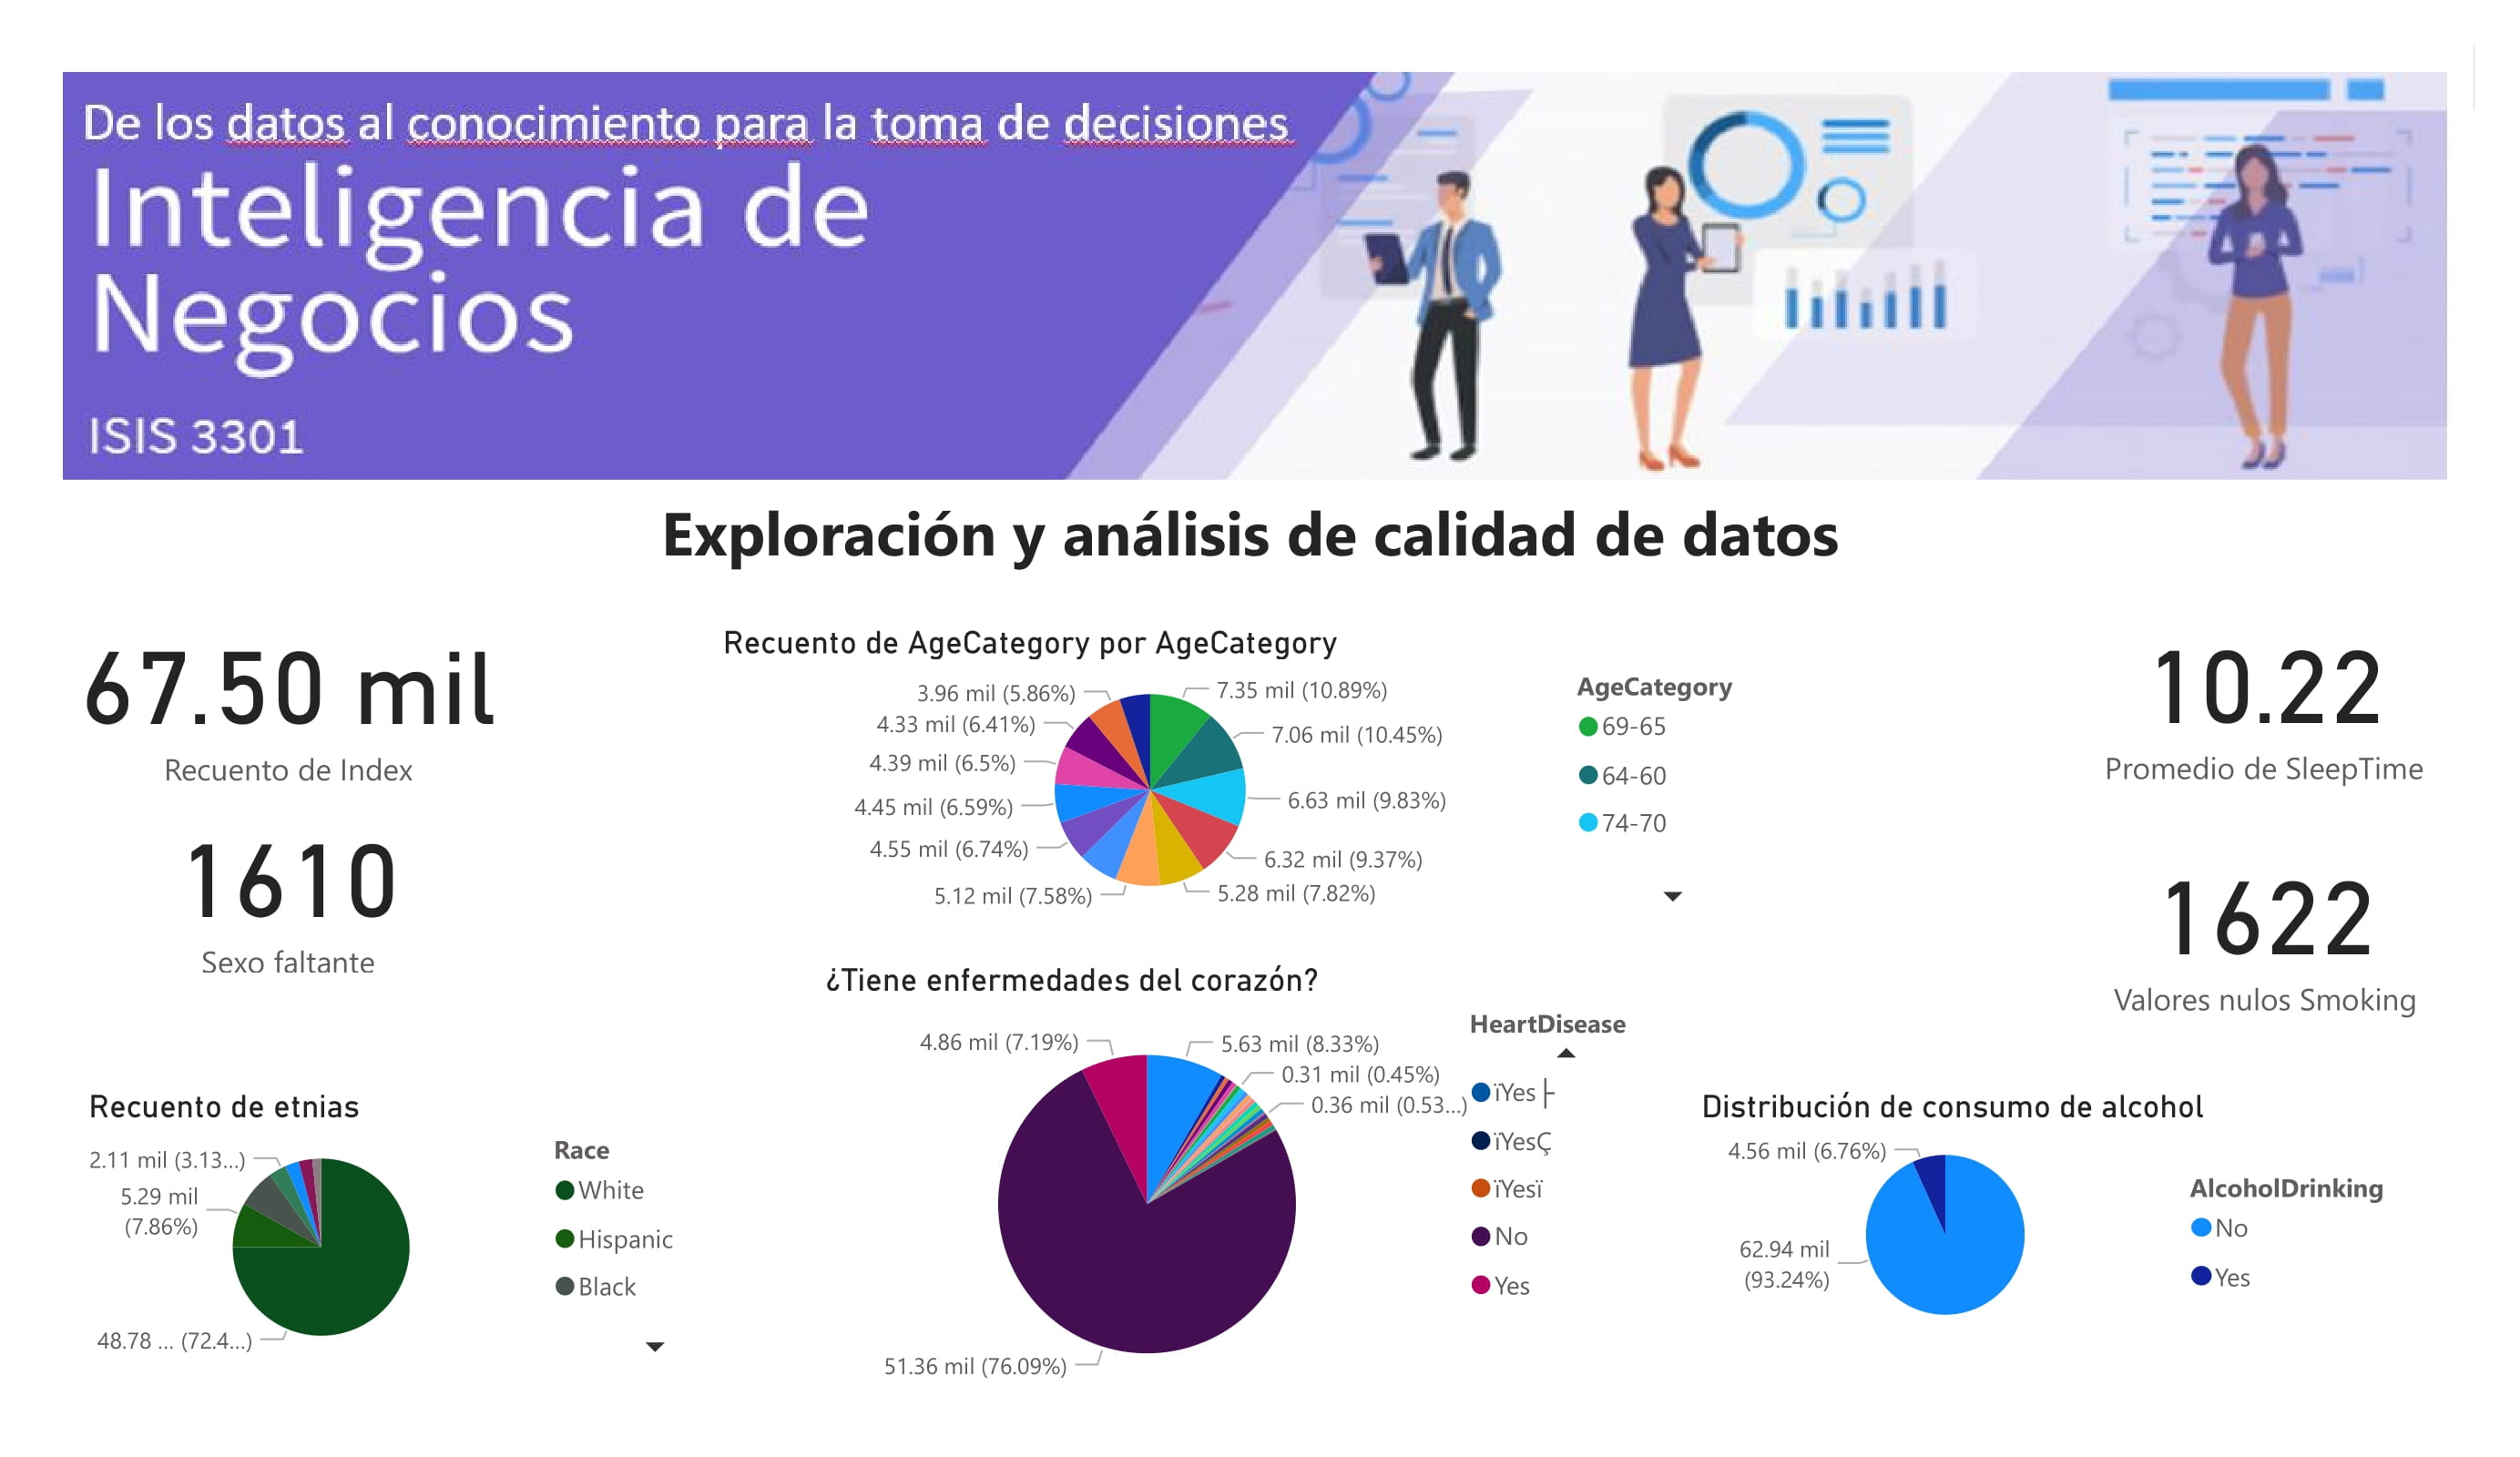


Primero, con la creación del tablero de control vemos como contamos con 67500 datos, los cuales representan registros de pacientes que presentan o no enfermedades del corazón.

En cuanto a los indicadores referentes a la calidad de los datos, podemos ver como podemos encontrar datos que no respetan nuestras reglas de negocio, saliendose de lo esperado. Aca podemos agrupar los datos de edad y raza, entre otros. Tambien vemos que encontramos problemas de completitud, encontrando espacios vacios, hecho que tambien debemos manejar. Entonces, vemos que tenemos que manejar datos con problemas de validez, unicidad y completitud a solucionar en la siguiente sección.

# 2. Limpieza de datos

En general para el manejo de los datos, y buscando crear el mejor modelo descartando la menor cantidad de datos decidimos representar los datos invalidos con una variable categorica o numerica, sin eliminarlos. Decidimos optar por esto, en vez de cambiarlos con la media o demás estrategias, pues esto permitio mejorar los modelos, de un 0.82 a 0.87 en promedio en los indicadores utilizados.

## 2.1 Valores booleanos
Para la limpieza de datos empezamos por los valores booleanos, donde intentamos recuperar todo valor que incluya en su celda el valor de "Yes" o "No", incluyendo las celdas que tenian un más de una respuesta "Yes" y "No" en estos dos valores.

Decidimos eliminar las celdas, pues esto mejora el desempeño del algoritmo y permite la coherente transformación de los datos, pues de lo contrario se favoreceria sin sentido una de las clases. Bien sea "Yes" o "No.

In [ ]:
## Depuramos los booleanos fueran de formato, rescatando los datos
## donde Yes, No estan incluidos dentro del registro, pero cuentan 
## con mas caracteres. (Ej ýNoÚ)
def depurar_booleanos(registro):
  if "yes" in registro.lower():
    return "Yes"
  ## Dejamos la cadena vacia para que este sea parseado posteriormente a False.
  elif "no" in registro.lower():
    return ""
  else: 
    return "Invalid"
## Arreglo de columnas booleanas a depurar.
booleanColumns = ["Smoking","AlcoholDrinking","Stroke","DiffWalking",
                  "Diabetic","PhysicalActivity","Asthma","KidneyDisease",
                  "SkinCancer"]
## Depuracion y descarte de datos invalidos.
for colName in booleanColumns:
  df_duplicado[colName] = df_duplicado[colName].apply(lambda x: depurar_booleanos(x))
  df_duplicado = df_duplicado[(df_duplicado[colName] != "Invalid")]
## Conversion final a datos booleanos.
df_duplicado = df_duplicado.astype({'Smoking':'bool','AlcoholDrinking':'bool', 'Stroke':'bool',
                     'DiffWalking': 'bool', 'Diabetic':'bool', 'PhysicalActivity':'bool',
                     'Asthma':'bool', 'KidneyDisease':'bool', 'SkinCancer':'bool',                    
                     })
## Resutlados de referencia.
diff = int(df.shape[0]) - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros en total.")

Se han descartado 0 registros en total.


## 2.2 Valores de Sexo
Para los valores de sexo unicamente manejamos los valores de Male y Female, agrupando los restantes en una categoria "Invalid".

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Depuramos los datos del sexo, dejando unicamente
## dos variables categoricas, Male y Female
def depurar_sexo(registro):
  if "Male" in registro:
    return "Male"
  elif "Female" in registro:
    return "Female"
  else:
    return "Invalid"
df_duplicado["Sex"] = df_duplicado["Sex"].apply(depurar_sexo)
## Filtramos los datos invalidos.
# df_duplicado = df_duplicado[(df_duplicado["Sex"] != "Invalid")]
## Transformamos los datos categoricos con numericos 1 para Male, 0 para Female.
# leSX = LabelEncoder()
# df_duplicado["Sex"] = leSX.fit_transform(df_duplicado["Sex"])

df_duplicado = pd.get_dummies(df_duplicado, columns =["Sex"])
## Datos de referencia.
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.3 Valores de Sleep Time
Para los valores de sexo unicamente manejamos los valores en un rango de 0 a 24, agrupando los restantes con un valor final de -1 representando esto su invalidez.

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Funcion para depurar los datos de sleep time, para unicamente
## permitir datos en el rango esperado.
def depurar_sleep_time(registro):
  try:
    registro = str(registro)
    num = ''.join(char for char in registro if char.isdigit() or char == '.')
    num = abs(int(float(num)))
    if 0 < num  <= 24:
      resp = num
    else:
      resp = -1
  except:
    resp = -1
  return resp

df_duplicado["SleepTime"] = df_duplicado["SleepTime"].apply(depurar_sleep_time)
## Filtramos los datos invalidos.
# df_duplicado = df_duplicado[(df_duplicado["SleepTime"] != "Invalid")]
## Cambiamos el tipo de dato finalmente.
df_duplicado["SleepTime"] = df_duplicado["SleepTime"].astype("int64")

## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.4 Valores de Mental y Phisycal Health
Para los valores de sexo unicamente manejamos los valores en un rango de 0 a 30, agrupando los restantes con un valor final de -1 representando esto su invalidez.

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Funcion para depurar los datos de mental y physical health
## para unicamente permitir datos en el rango esperado.
def depurar_mp_health(registro):
  try:
    registro = str(registro)
    ## Limpiamos el registro
    num = ''.join(char for char in registro if char.isdigit() or char == '.')
    num = abs(float(num))
    if 30 >= num >= 0:
      resp = num
    else:
      resp = -1
  except:
   resp = -1
  return resp

df_duplicado["MentalHealth"] = df_duplicado["MentalHealth"].apply(depurar_mp_health)
df_duplicado["PhysicalHealth"] = df_duplicado["PhysicalHealth"].apply(depurar_mp_health)
## Filtramos los datos invalidos.
# df_duplicado = df_duplicado[(df_duplicado["MentalHealth"] != "Invalid")]
# df_duplicado = df_duplicado[(df_duplicado["PhysicalHealth"] != "Invalid")]
## Parseamos los datos.
df_duplicado["MentalHealth"] = df_duplicado["MentalHealth"].astype("int64")
df_duplicado["PhysicalHealth"] = df_duplicado["PhysicalHealth"].astype("int64")

## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.5 Valores de BMI
Para los valores de sexo unicamente manejamos los valores en un rango de 1 a 99, agrupando los restantes con un valor final de -1.0 representando esto su invalidez.

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Funcion para depurar los datos de bmi
## para unicamente permitir datos en el rango esperado.
def depurar_bmi(registro):
  try:
    registro = str(registro)
    num = ''.join(char for char in registro if char.isdigit() or char == '.')
    num = abs(float(num))
    if 99 > num > 1:
      resp = num
    else:
      resp  = -1.0
  except:
    resp = -1.0
  return resp

df_duplicado["BMI"] = df_duplicado["BMI"].apply(depurar_bmi)
## Filtramos los datos invalidos.
# df_duplicado = df_duplicado[(df_duplicado["BMI"] != "Invalid")]
df_duplicado["BMI"] = df_duplicado["BMI"].astype("float64")
## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.6 Valores de Raza
Para los valores de raza manejamos los registros, agrupandolas en las categorias definidas por el negocio. Notamos tambien que, de acuerdo a la fase de entendimiento de los datos, la existen "American Indian/ Alaskan Native" como categoria. Esto lo manejamos agrupandolos a la categoria de otros, pues así estan definidos los datos.

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Depuramos los datos de raza, dejando unicamente
## cinco variables categoricas.
def depurar_raza(registro):
  i = 0
  razas = ["White","Hispanic","Black","Asian","Other"]
  while i < len(razas):
    if razas[i] in registro:
      return razas[i]
    i+=1
  if "American" in registro:
      return "Other"
  return "Invalid"
df_duplicado["Race"] = df_duplicado["Race"].apply(depurar_raza)
## Filtramos los datos invalidos.
## df_duplicado = df_duplicado[(df_duplicado["Race"] != "Invalid")]
## Transformamos los datos categoricos con numericos
## 0 = Asian, 1 = Black, 2 = Hispanic, 3 = Other, 4 = White
df_duplicado = pd.get_dummies(df_duplicado, columns =["Race"])

## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.7 Valores de GenHealth
Para los valores de GenHealth manejamos los registros, agrupandolas en las categorias definidas por el negocio. Agrupando las demas en la categoria representada con el numero -1, pues no logramos identificar una categoria que requiera un manejo diferente.

In [ ]:
num_prev = int(df_duplicado.shape[0])
## Depuramos los datos del genHealth, dejando 
## unicamente cinco variables categoricas
def depurar_gen_health(registro):
  i = 0
  states = ["Excellent","Very good","Good","Fair","Poor"]
  while i < len(states):
    if states[i] in registro:
      return i
    i+=1
  return -1
df_duplicado["GenHealth"] = df_duplicado["GenHealth"].apply(depurar_gen_health)
## Filtramos los datos invalidos.
df_duplicado["GenHealth"] = df_duplicado["GenHealth"].astype("int64")

## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.8 Valores de Edad
Para los valores de edad manejamos los registros, agrupandolas en las categorias definidas por el negocio. Filtrando su validez, y como se desea considerar unicamente las edades mayores a 50, las demas se agrupan en una propia categoria para su analisis. Manejamos LabelEnconder en este caso, pues las categorias se manejan de forma ascendente con respecto a las edades, permitiendo un correcto manejo en los modelos.

In [ ]:
num_prev = int(df_duplicado.shape[0])
def depurar_age_category(registro):
  try:
    registro = str(registro)
    filter = ''.join(char for char in registro if char.isdigit() or char == '-')
    num = filter.split('-')
    resp = "Invalid"
    for age in num:
      if int(age) >= 50:
        resp = filter
      else:
        ## Agrupamos los valores que no son coherentes con el objetivo de 
        ## negocio para su posterior analisisPero sin descartarlos.
        resp = "18-49"
  except:
    resp = "Invalid"
  return resp
df_duplicado["AgeCategory"] = df_duplicado["AgeCategory"].apply(depurar_age_category)
## Filtramos los datos invalidos.
## df_duplicado = df_duplicado[(df_duplicado["AgeCategory"] != "Invalid")]
df_duplicado["AgeCategory"] = df_duplicado["AgeCategory"].astype("string")
## Transformamos los datos categoricos con numericos. Ordenadamente por los rangos, siendo 0 el menor.
leAC = LabelEncoder()
df_duplicado["AgeCategory"] = leAC.fit_transform(df_duplicado["AgeCategory"])
## Datos de referencia
diff += num_prev - int(df_duplicado.shape[0])
print("Se han descartado " + str(diff) + " registros hasta el momento.")

Se han descartado 0 registros hasta el momento.


## 2.9 Datos resultantes

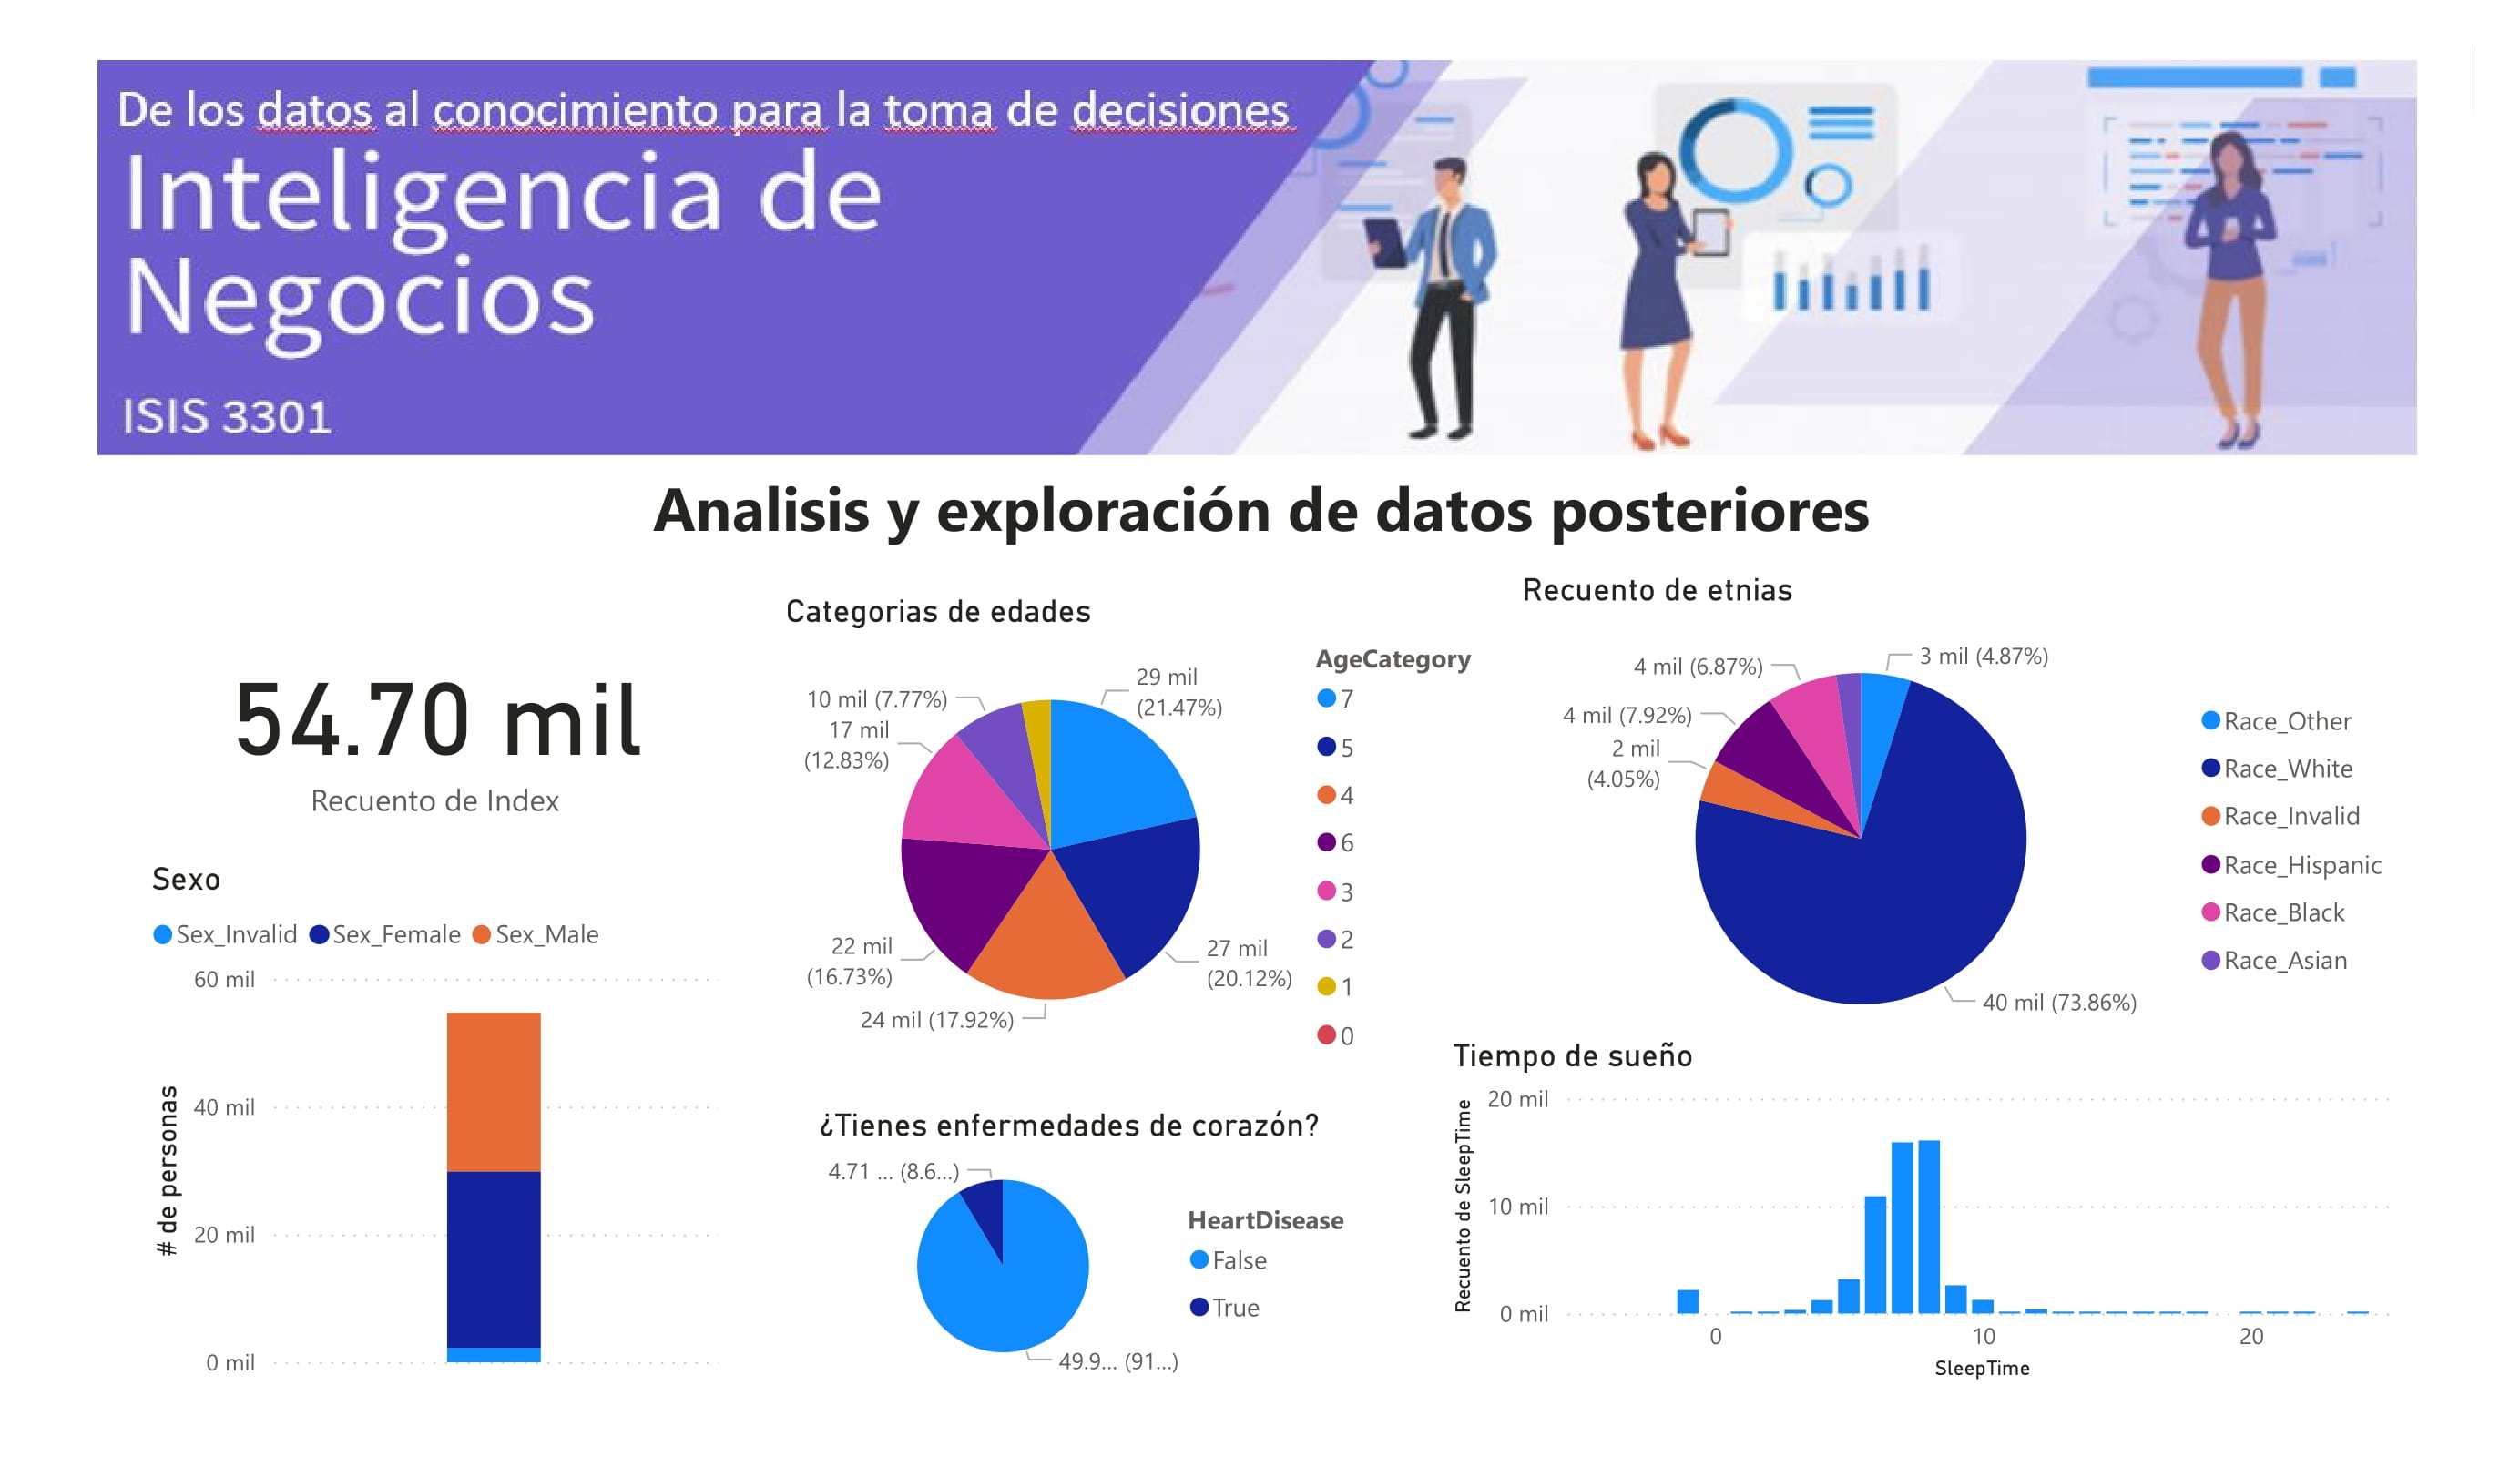

La interpretación mejora de forma considerable para una empresa al hacer limpieza de datos y trazar medidas y filtros en ellos según las métricas de la empresa y las restricciones lógicas (como las horas de sueño negativas o superiores a 24), por lo tanto es bastante valioso este proceso, juntando la ayuda de las herramientas de inteligencia de negocios para dar valor grafico y procesable a la información dada​. Donde eliminamos 12800 registros por su falta de validez.

In [ ]:
df_duplicado.head(5)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,...,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,26.45,False,False,False,0,0,False,0,False,True,...,False,False,False,0,1,0,0,0,0,1
1,25.75,True,False,False,30,5,True,2,False,True,...,False,False,False,1,0,0,0,0,0,1
2,37.50,True,False,False,0,0,False,0,False,True,...,False,False,False,0,1,0,0,0,0,1
3,43.40,True,False,True,30,28,True,2,True,False,...,False,True,False,1,0,0,1,0,0,0
4,34.95,False,False,False,1,0,True,3,False,False,...,False,False,False,1,0,0,1,0,0,0


In [ ]:
df_duplicado.dtypes

BMI                 float64
Smoking                bool
AlcoholDrinking        bool
Stroke                 bool
PhysicalHealth        int64
MentalHealth          int64
DiffWalking            bool
AgeCategory           int64
Diabetic               bool
PhysicalActivity       bool
GenHealth             int64
SleepTime             int64
Asthma                 bool
KidneyDisease          bool
SkinCancer             bool
Sex_Female            uint8
Sex_Male              uint8
Race_Asian            uint8
Race_Black            uint8
Race_Hispanic         uint8
Race_Other            uint8
Race_White            uint8
dtype: object

# 3. Creación de modelos

## 3.0 Definición de variable objetivo

Para los datos, utilizamos dos tecnicas para pasar de datos categoricos a numericos, LabelEncoder y One Hot Encoder. El primero utilizado si manejabamos categorias correlacionadas, o binarias, de tal modo en que los numeros finales representaran su dependencia, o falta de la misma. Un ejemplo de ello corresponde a GenHealth y Race resepctivamente. Manejamos los datos de esta forma, uniformemente, y sin importar el algoritmo pues creemos que en general esto mejora su desempeño, y no se requieren de ajustes situacionales.

In [ ]:
df_duplicado.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease', 'Sex_Female', 'Sex_Invalid', 'Sex_Male',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Invalid',
       'Race_Other', 'Race_White'],
      dtype='object')

Para el descarte de categorias, vemos que, consultando a medicos con experiencia en el area, estos nos comentan que. En el caso del cáncer de piel si bien se ha encontrado en ciertas bibliografías correlacionado indirectamente con enfermadad cardíaca no es un indicador fiable debido a su baja especificidad. Por otro lado, se descarta la variable de la independencia funcional motora, que conocemos en este contexto como, "DiffWalking". Esto debido a sus indicadores muestran una baja correlación, en todos los casos, con la variable objetivo.

In [ ]:
target = 'HeartDisease'
remove = [target,"Sex_Invalid","Race_Invalid","SkinCancer","DiffWalking"]

## 3.1 Arbol de decisión


In [ ]:
df_duplicado.shape

(54700, 25)

### 3.1.0 Explicación del Modelo - César Luis Moreno - 201924899


El arbol fue creado con el apoyo de un balanceador, en especifico el RandomOverSampler, pues despues de realizar una serie de pruebas, este nos mostró el mejor desempeño. Por otro lado, mediante la busqueda de hiperparametros con GridSearch llegamos a la conclusión de que los que nos brindan un mejor desempeño corresponden a un criterio de pureza dado por el coeficiente de gini, una profundidad maxima de 41 y un minimo de 2 samples para dividirse.

### 3.1.1 Preparación de datos

In [ ]:
# Variable objetivo
Y_prev = df_duplicado[target]
# Del conjunto de datos eliminamos la variable objetivo
X_prev = df_duplicado.drop(remove, axis=1)
# Elegimos la tecnica para manejar desbalance. Reducir las muestras 
# en exceo (rus) o aumentar las escasas (ros o smote).

# Donde elegimos Ros por su desempeño.
# balancer = RandomUnderSampler(random_state=0, replacement=True)
# balancer = SMOTE()
balancer = RandomOverSampler(random_state=0)




### 3.1.2 Creación del Modelo

In [ ]:
#Creamos el modelo
X_train_arbol, X_test_arbol, Y_train_arbol, Y_test_arbol = train_test_split(X_prev, Y_prev, test_size=0.25, random_state=0)
X_train_arbol, Y_train_arbol = balancer.fit_resample(X_train_arbol, Y_train_arbol)
# Hiperparametros finales de acuerdo al GirdSearch
arbol = DecisionTreeClassifier(criterion='gini', random_state=0, max_depth = 41, min_samples_split = 2)
arbol = arbol.fit(X_train_arbol,Y_train_arbol)
y_pred_arbol = arbol.predict(X_test_arbol)

In [ ]:
Y_train_arbol.value_counts()

False    37453
True     37453
Name: HeartDisease, dtype: int64

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


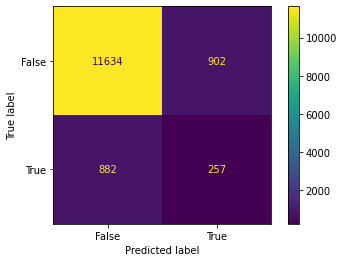

In [ ]:
# Vemos la matriz de confusiones.
plot_confusion_matrix(arbol, X_test_arbol, Y_test_arbol)  
plt.show()  

In [ ]:
print(classification_report(Y_test_arbol, y_pred_arbol))

              precision    recall  f1-score   support

       False       0.93      0.93      0.93     12536
        True       0.22      0.23      0.22      1139

    accuracy                           0.87     13675
   macro avg       0.58      0.58      0.58     13675
weighted avg       0.87      0.87      0.87     13675



In [ ]:
importancia= arbol.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train_arbol.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,BMI,0.273019
1,AgeCategory,0.205570
2,GenHealth,0.113561
3,SleepTime,0.084388
4,PhysicalHealth,0.062190
5,MentalHealth,0.051105
6,Stroke,0.024683
7,Smoking,0.023530
8,PhysicalActivity,0.020953
9,Asthma,0.020570


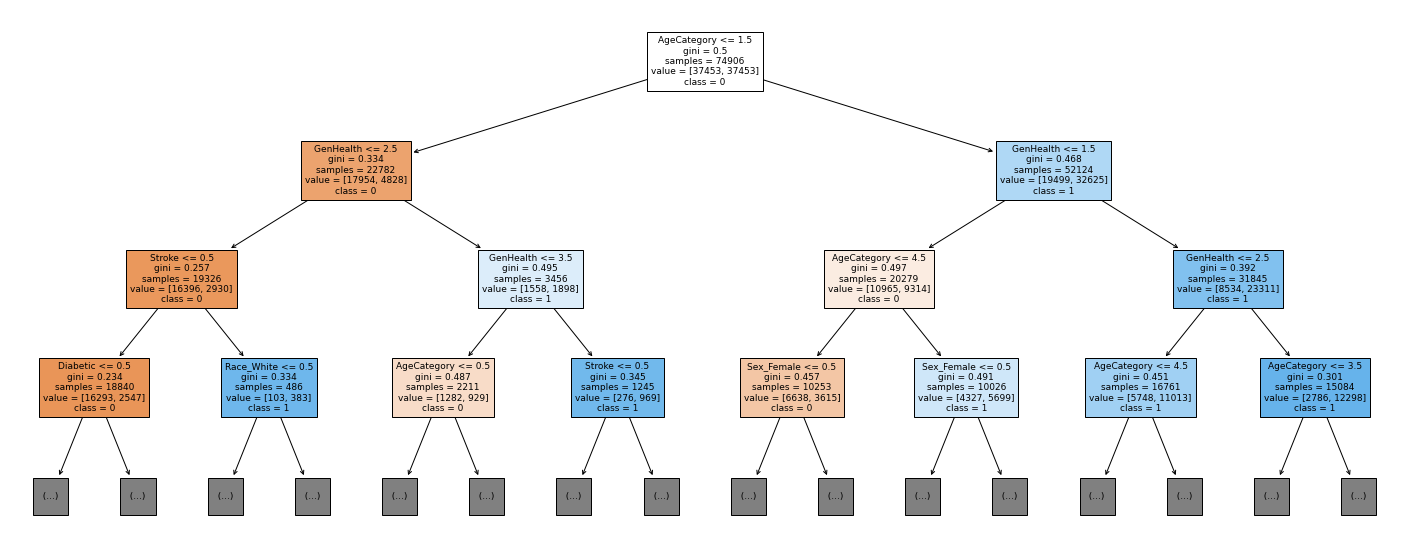

In [ ]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X_prev.columns, class_names=["0", "1"], filled=True, fontsize=9)

### 3.1.3 Busqueda de hiperparametros

In [ ]:
# Manejamos el numero de particiones
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
# Matriz de parametros
param_grid = {'criterion':['gini', 'entropy'],'max_depth':[38,39,40,41,42,43,44],'min_samples_split':[2, 3]}
# Creamos el arbol
arbol = DecisionTreeClassifier(random_state=0)
mejor_arbol = GridSearchCV(arbol, param_grid, cv=particiones)
# Ajuste del modelo
mejor_arbol.fit(X_train_arbol, Y_train_arbol)
# Obtener el mejor modelo.
arbol_final = mejor_arbol.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train_arbol = arbol_final.predict(X_train_arbol)
y_pred_test_arbol = arbol_final.predict(X_test_arbol)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_arbol, y_pred_train_arbol))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_arbol, y_pred_test_arbol))

In [ ]:
# Hiperparametros finales
mejor_arbol.best_params_

{'criterion': 'gini', 'max_depth': 41, 'min_samples_split': 2}

## 3.2 KNN

### 3.1.0 Explicación del Modelo - Juan Vergara 201815660

El modelo Knn fue creado con el apoyo de un balanceador, en especifico el RandomOverSampler, pues despues de realizar una serie de pruebas, este nos mostró el mejor desempeño, mayor que el SMOTE. Por otro lado, mediante la busqueda de hiperparametros con GridSearch llegamos a la conclusión de que los que nos brindan un mejor desempeño corresponden a utilizar la función de distancia de manhattan, y un numero de 2 vecinos. Donde este valor k  define cuantos vecinos se verifican para determinar la clasificación de un punto de consulta específico y la longitud Manhattan nos dice que la distancia entre 2 puntos es la suma de las diferencias absolutas de sus coordenadas.

### 3.2.1 Preparación del modelo

In [ ]:
# Variable objetivo
Y_prev = df_duplicado[target]
# Del conjunto de datos eliminamos la variable objetivo
X_prev = df_duplicado.drop([target], axis=1)
# Elegimos la tecnica para manejar desbalance. Reducir las muestras 
# en exceo (rus) o aumentar las escasas (ros o smote).
# balancer2 = RandomUnderSampler(random_state=0, replacement=True)
# balancer2 = SMOTE()

# Donde elegimos Ros por desempeño
balancer2 = RandomOverSampler(random_state=0)

### 3.2.2 Creación del Modelo

In [ ]:
#Creamos el modelo
X_train_knn_p, X_test_knn, Y_train_knn_p, Y_test_knn = train_test_split(X_prev, Y_prev, test_size=0.20, random_state=0)
X_train_knn, Y_train_knn = balancer2.fit_resample(X_train_knn_p, Y_train_knn_p)
neigh = KNeighborsClassifier(n_neighbors=2,p=1)
neigh = neigh.fit(X_train_knn, Y_train_knn)
y_pred_knn = neigh.predict(X_test_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


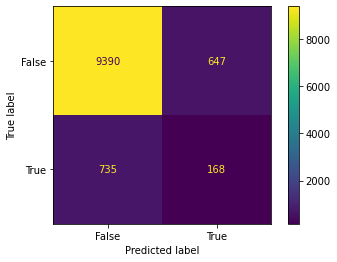

In [ ]:
plot_confusion_matrix(neigh, X_test_knn, Y_test_knn)  
plt.show()

In [ ]:
print(classification_report(Y_test_knn, y_pred_knn))

              precision    recall  f1-score   support

       False       0.93      0.94      0.93     10037
        True       0.21      0.19      0.20       903

    accuracy                           0.87     10940
   macro avg       0.57      0.56      0.56     10940
weighted avg       0.87      0.87      0.87     10940



### 3.2.3 Busqueda de hiperparametros

In [ ]:

k = list(range(1,10))
p=[1,2]
# Usamos Cross-Validation
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

hyperparameters = dict(n_neighbors=k, p=p)

knn_2 = KNeighborsClassifier()

mejor_modelo_knn = GridSearchCV(knn_2, hyperparameters, cv=particiones)

mejor_modelo_knn.fit(X_train_knn, Y_train_knn)

In [ ]:
neigh_final = mejor_modelo_knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train_knn = neigh_final.predict(X_train_knn)
y_pred_test_knn = neigh_final.predict(X_test_knn)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_knn, y_pred_train_knn))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_knn, y_pred_test_knn))

Exactitud sobre entrenamiento: 0.99
Exactitud sobre test: 0.86


In [ ]:
mejor_modelo_knn.best_params_

{'n_neighbors': 2, 'p': 1}

## 3.3. Random Forest - César Luis Moreno - 201924899

El RandomForest fue creado con el apoyo de un balanceador, en especifico el SMOTE, pues despues de realizar una serie de pruebas, este nos mostró el mejor desempeño. Por otro lado, mediante la busqueda de hiperparametros con GridSearch llegamos a la conclusión de que los que nos brindan un mejor desempeño corresponden a un criterio de pureza dado por la entropia, una profundidad maxima de 41 y un minimo de 3 samples para dividirse.

### 3.3.1 Preparación del Modelo

In [ ]:
# Variable objetivo
Y_prev = df_duplicado[target]
# Del conjunto de datos eliminamos la variable objetivo
X_prev = df_duplicado.drop(remove, axis=1)
# Elegimos la tecnica para manejar desbalance. Reducir las muestras 
# en exceo (rus) o aumentar las escasas (ros).
# balancer3 = RandomUnderSampler(random_state=0, replacement=True)
balancer3 = SMOTE()
# balancer3 = RandomOverSampler(random_state=0)



### 3.3.2 Creación del Modelo

In [ ]:
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X_prev, Y_prev, test_size=0.20, random_state=0)
X_train_rf, Y_train_rf = balancer3.fit_resample(X_train_rf, Y_train_rf)
# Hiperparametros finales de acuerdo al GirdSearch
rf = RandomForestClassifier(n_estimators=100,criterion='entropy', random_state=0, max_depth = 41, min_samples_split = 3)
rf = rf.fit(X_train_rf,Y_train_rf)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


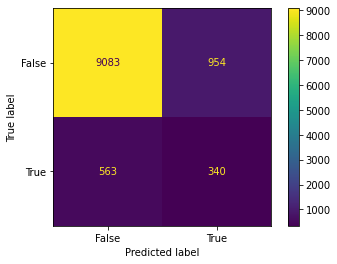

In [ ]:
# Vemos la matriz de confusiones.
plot_confusion_matrix(rf, X_test_rf, Y_test_rf)  
plt.show()  

In [ ]:
print(classification_report(Y_test_rf, y_pred))

In [ ]:
importancia= rf.feature_importances_
importancia_atributo = pd.DataFrame(data={"Atributo": X_train_rf.columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

### 3.3.3 Busqueda de hiperparametros

In [ ]:
# Manejamos el numero de particiones
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
# Matriz de parametros
param_grid = {'n_estimators':[99,100],'criterion':['gini', 'entropy'],'max_depth':[38,40,42],'min_samples_split':[2,3,4]}
# Creamos el arbol
rf = RandomForestClassifier(random_state=0)
mejor_modelo = GridSearchCV(rf, param_grid, cv=particiones)
# Ajuste del modelo
mejor_modelo.fit(X_train_rf, Y_train_rf)
# Obtener el mejor modelo.
arbol_final = mejor_modelo.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = arbol_final.predict(X_train_rf)
y_pred_test = arbol_final.predict(X_test_rf)

print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train_rf, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test_rf, y_pred_test))

In [ ]:
mejor_modelo.best_params_

#4. Conclusiones



## 4.1 Utilidad de los modelos
Vemos que contamos con 3 modelos que nos ayudan a predecir, de acuerdo al historial clinico de un paciente la probabilidad de que este presente o no una enfermedad del corazón. Vemos que los modelos nos indican esto con un 87% de precisión, por lo que pueden ser utilizados tanto individual como conjuntamente para este fin. Ademas, en cuanto al modelo del arbol este nos deja ver cuales caracteristicas estan fuertemente correlacionadas con esto de forma visual, y aunque las estadisticas de los modelos difieran, vemos que podemos concluir que BMI, AgeCategory, GenHealth, SleepTime y	PhysicalHealth son los más influyentes. Esto lo podemos interpretar como, las personas con mayor BMI, mayor edad, peor salud en general, peor sueño y peor salud fisica son los más factibles a presentar una enfermedad cardiaca.

## 4.2 Mejor modelo

Concluimos que el mejor modelo, sin lugar a dudas corresponde al de RandomForest, aunque vemos que su desempeño temporal es el peor. Esto lo podemos ver dado que nos muestra unos indicadores mayores al 87%, estandar de los demás modelos. Sin importar ello vemos que los modelos logran indicadores bastante favorables, razón por la cual se puede optar por arboles, si se desea sacrificar presición por tiempo de creación y ejecución.

# 4.3 Recomendaciones finales

Las recomendaciones finales para SaludAlpes corresponde a utilizar el modelo final, para priorizar pacientes con altas probabilidades de presentar enfermedades cardiacas, y así poder brindarles una atención oportuna. Además, si es posible contrastar la información de pacientes reincidentes con su registro en la base de datos, en pro de purificar dichos datos y conseguir un modelo con mejores indicadores, es decir, mayor utilidad para la situación.

# 4.4 Video de explicación de los tableros
https://youtu.be/DOwegG06U38